In [1]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
l=[]
norm_x=[]
target=[]
dic2={}
t2=0
dic1={}
t1=0
dic3={}
t3=0
for i in range(1,2):
    for j in range(1,2):
        f=open("2015/0"+str(i)+"/20150"+str(i)+"0"+str(j)+".txt","r")
        for line in f.readlines():
            l.append(line.split("\t"))
            '''
            ignore if label is not -1 or -2 or 1
            '''
            if l[-1][17]!='1' and l[-1][17] !='-1' and l[-1][17]!='-2':
                continue
            '''
            converting catagorical values to metric
            '''
            t=l[-1][1]
            if t not in dic2:
                dic2.update({t:t2})
                t2+=1
            l[-1][1]=dic2[t]

            t=l[-1][-1]
            if t not in dic1:
                dic1.update({t:t1})
                t1+=1
            l[-1][-1]=dic1[t]

            t=l[-1][13]
            if t not in dic3:
                dic3.update({t:t3})
                t3+=1
            l[-1][13]=dic3[t]

            '''
            end of conversion
    
    
            converting ip adress into decimal
            '''
            x=[]
            for k in l[-1][20].split(':'):
                x.append(str(int(k,16)))
            l[-1][20]=int("".join(x))
            
            x=[]
            for k in l[-1][18].split(':'):
                x.append(str(int(k,16)))
            l[-1][18]=int("".join(x))
            '''
            end of conversion
    
            converting ids malware and anshula to 0 and 1
            '''
            if l[-1][14] != '0':
                l[-1][14]=1
            if l[-1][15] != '0':
                l[-1][15]=1
            if l[-1][16] != '0':
                l[-1][16]=1
            '''
            end of conversion
    
            converting time to int
            '''
            x=[]
            for k in l[-1][22].split(':'):
                x.append(str(int(k)))
            l[-1][22]=int("".join(x))
            '''
            end of conversion
            '''
            
            norm_x.append(list())
            t=0
            for x in l[-1]:
                if t!=17:
                    norm_x[-1].append(float(x))
                else:
                    if int(x)==-1:
                        target.append(1)
                    if int(x)==-2:
                        target.append(1)
                    if int(x)==1:
                        target.append(0)
                t+=1

In [3]:
norm_x=preprocessing.normalize(norm_x)

In [4]:
X = SelectKBest(chi2, k=3).fit_transform(norm_x, target)

In [5]:
df = pd.DataFrame(X)
trainx, testx, trainy, testy = train_test_split(df,np.array(target), test_size=0.2)
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(304884, 3)
(304884,)
(76221, 3)
(76221,)


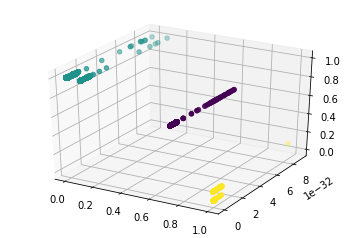

In [6]:
km=KMeans(n_clusters=3).fit(trainx)
ax = plt.axes(projection='3d')
ax.scatter3D(trainx[0],trainx[1],trainx[2],c=km.labels_)

In [7]:
k1=[0,0]
k2=[0,0]
k3=[0,0]
j=0
for i in km.labels_:
        if i==0:
            k1[trainy[j]]+=1
        if i==1:
            k2[trainy[j]]+=1
        if i==2:
            k3[trainy[j]]+=1
        j+=1
l1=k1.index(max(k1))
l2=k2.index(max(k2))
l3=k3.index(max(k3))

In [8]:
res=km.predict(testx)

In [9]:
pred=[]
for i in res:
    if i==0:
        pred.append(l1)
    if i==1:
        pred.append(l2)
    if i==2:
        pred.append(l3)


In [10]:
tn,fp,fn,tp =confusion_matrix(testy,pred).ravel()

In [11]:
print("accuraccy :"+str((tp+tn)/(tn+tp+fn+fp)))
print("precison :"+str(tp/(tp+fp)))
print("recall :"+str(tp/(tp+fn)))
print("specificity :"+str(tn/(tn+fp)))
print("false positive rate :"+str(fp/(tn+fp)))
print("false negative rate :"+str(fn/(tp+fn)))

accuraccy :0.8914341192059931
precison :0.8914341192059931
recall :1.0
specificity :0.0
false positive rate :1.0
false negative rate :0.0
